In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import numpy as np

In [ ]:
! wget https://lfs.aminer.cn/lab-datasets/citation/acm.v9.zip

--2023-05-22 02:06:33--  https://lfs.aminer.cn/lab-datasets/citation/acm.v9.zip
Resolving lfs.aminer.cn (lfs.aminer.cn)... 159.27.2.14
Connecting to lfs.aminer.cn (lfs.aminer.cn)|159.27.2.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 686542584 (655M) [application/zip]
Saving to: ‘acm.v9.zip’

acm.v9.zip          100%[===================>] 654.74M  29.5MB/s    in 24s     

2023-05-22 02:06:57 (27.8 MB/s) - ‘acm.v9.zip’ saved [686542584/686542584]



In [ ]:
!unzip acm.v9.zip

Archive:  acm.v9.zip
  inflating: acm.txt                 


In [ ]:
#@title Default title text
# Initialize variables
data = []
current_entry = {}
unique_ref_ids = set()  

# Open the file in read mode
with open('acm.txt', "r") as file:
    # Read the file line by line
    for line in tqdm.tqdm(file):
        line = line.strip()  # Remove leading/trailing whitespace

        # Check if a new entry should start
        if line == "":
            if current_entry:
                data.append(current_entry)
            current_entry = {}
            continue
        # Extract the key and value from each line
        key = line[:2]
        value = line[2:]

        # Store the key-value pair in the current entry dictionary
        if key not in current_entry:
          current_entry[key] = value
        else:
          current_entry[key] = current_entry[key] + "," + value
        
        if key == "#%":
            unique_ref_ids.add(value)

# Convert the set back to a list if needed
unique_ref_ids = list(unique_ref_ids)
                      
# Append the last entry
if current_entry:
    data.append(current_entry)

# Ensure all keys are present in each entry and set missing keys to "missing"
keys = set().union(*(entry.keys() for entry in data))
for entry in data:
    for key in keys:
        entry.setdefault(key, "missing")

25494853it [00:34, 732698.34it/s]


In [ ]:
# Create a DataFrame from the extracted data
df = pd.DataFrame(data)

In [ ]:
#Checking missing values in the dataset/columns
df.isnull().sum(axis=0)

#*    0
#t    0
#c    0
#i    0
#@    0
#!    0
#%    0
dtype: int64

In [ ]:
df.head()

,#*,#t,#c,#i,#@,#!,#%
0,MOSFET table look-up models for circuit simula...,1984,"Integration, the VLSI Journal",ndex1,missing,missing,missing
1,The verification of the protection mechanisms ...,1984,International Journal of Parallel Programming,ndex2,Virgil D. Gligor,missing,missing
2,Another view of functional and multivalued dep...,1984,International Journal of Parallel Programming,ndex3,"M. Gyssens, J. Paredaens",missing,missing
3,Entity-relationship diagrams which are in BCNF,1984,International Journal of Parallel Programming,ndex4,"Sushil Jajodia, Peter A. Ng, Frederick N. Spri...",missing,missing
4,The computer comes of age,1984,The computer comes of age,ndex5,Rene Moreau,missing,missing


In [ ]:
#View the column
df.columns

Index(['#*', '#t', '#c', '#i', '#@', '#!', '#%'], dtype='object')

In [ ]:
# What we have currently in columns titele
"""
#* --- paperTitle
#@ --- Authors
#t ---- Year
#c  --- publication venue
#index 00---- index id of this paper
#% ---- the id of references of this paper (there are multiple lines, with each indicating a reference)
#! --- Abstract
"""

'\n#* --- paperTitle\n#@ --- Authors\n#t ---- Year\n#c  --- publication venue\n#index 00---- index id of this paper\n#% ---- the id of references of this paper (there are multiple lines, with each indicating a reference)\n#! --- Abstract\n'

In [ ]:
#Renaming
column_names = ['title', 'year', 'publicationvenue', 'index', 'authors', 'abstract',  'references_id']

df.rename(columns={'#*':'title', '#t':'year', '#c':'publicationvenue', '#i':'index', '#@':'authors', '#!':'abstract',  '#%':'references_id'}, inplace=True)


In [ ]:
# Display the change
df.head()

,title,year,publicationvenue,index,authors,abstract,references_id
0,MOSFET table look-up models for circuit simula...,1984,"Integration, the VLSI Journal",ndex1,missing,missing,missing
1,The verification of the protection mechanisms ...,1984,International Journal of Parallel Programming,ndex2,Virgil D. Gligor,missing,missing
2,Another view of functional and multivalued dep...,1984,International Journal of Parallel Programming,ndex3,"M. Gyssens, J. Paredaens",missing,missing
3,Entity-relationship diagrams which are in BCNF,1984,International Journal of Parallel Programming,ndex4,"Sushil Jajodia, Peter A. Ng, Frederick N. Spri...",missing,missing
4,The computer comes of age,1984,The computer comes of age,ndex5,Rene Moreau,missing,missing


In [ ]:
"A. Compute the number of distinct authors, publication venues, publications, and citations/references"

print("No. of distinct authors ", len(df['authors'].unique()) - 1)
print("No. of distinct venues ", len(df['publicationvenue'].unique()) - 1)
print("No. of distinct publications ", len(df['title'].unique()) - 1)
print("No. of distinct references ", len(unique_ref_ids))


No. of distinct authors  1670781
No. of distinct venues  273329
No. of distinct publications  2183551
No. of distinct references  1007495


In [ ]:
"B. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do you notice?"
conference_name = "Principles and Practice of Knowledge Discovery in Databases"
data = df[df["title"].str.contains(conference_name, case=False)]

print(data)

#data.head()

                                                     title  year  \
799732   Proceedings of the 8th European Conference on ...  2004   
921702   Knowledge Discovery in Databases: PKDD 2006: 1...  2006   
936468   Knowledge Discovery in Databases: PKDD 2005: 9...  2005   
1100120  Proceedings of the 11th European conference on...  2007   
1673545  Proceedings of the 9th European conference on ...  2005   

                                          publicationvenue        index  \
799732   PKDD '04 Proceedings of the 8th European Confe...   ndex799733   
921702   Knowledge Discovery in Databases: PKDD 2006: 1...   ndex921703   
936468   Knowledge Discovery in Databases: PKDD 2005: 9...   ndex936469   
1100120  PKDD 2007 Proceedings of the 11th European con...  ndex1100121   
1673545  PKDD'05 Proceedings of the 9th European confer...  ndex1673546   

                                                   authors abstract  \
799732   Jean-François Boulicaut, Floriana Esposito, Fo...  missing  

we can see the the count of distinct venues and title is not very accurate as even if the case is different the venue is counted as a different venue. Same would be true for authors and publications

Looking to venue names we observe some contains locations of countries/continent, dates (year), and conferences, stream lecture is on. All the venue doesn’t have the same description. The display shows there are a lot more bloated than the actual number of venues. Still doesn’t show a currant number or count. 



In [ ]:
data.head()

,title,year,publicationvenue,index,authors,abstract,references_id
799732,Proceedings of the 8th European Conference on ...,2004,PKDD '04 Proceedings of the 8th European Confe...,ndex799733,"Jean-François Boulicaut, Floriana Esposito, Fo...",missing,missing
921702,Knowledge Discovery in Databases: PKDD 2006: 1...,2006,Knowledge Discovery in Databases: PKDD 2006: 1...,ndex921703,"Johannes Fürnkranz, Tobias Scheffer, Myra Spil...",missing,missing
936468,Knowledge Discovery in Databases: PKDD 2005: 9...,2005,Knowledge Discovery in Databases: PKDD 2005: 9...,ndex936469,"Alípio Jorge, Luís Torgo, Pavel Brazdil, Rui C...",missing,missing
1100120,Proceedings of the 11th European conference on...,2007,PKDD 2007 Proceedings of the 11th European con...,ndex1100121,"Joost N. Kok, Jacek Koronacki, Ramon Lopez De ...",missing,missing
1673545,Proceedings of the 9th European conference on ...,2005,PKDD'05 Proceedings of the 9th European confer...,ndex1673546,"Alípio Mário Jorge, Luís Torgo, Pavel Brazdil,...",missing,missing


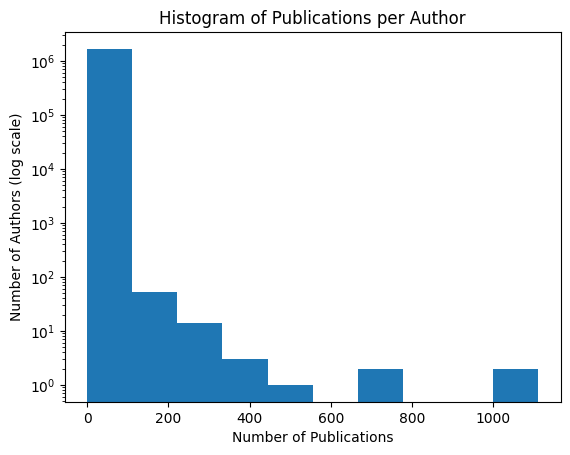

In [ ]:
# C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

# Group the dataframe by authors and aggregate the publications
publications_per_author = df[df != 'missing'].groupby('authors')['title'].count()

# Plot the histogram with a logarithmic scale on the y-axis
plt.hist(publications_per_author, bins=10, log=True)

# Set plot labels and title
plt.xlabel('Number of Publications')
plt.ylabel('Number of Authors (log scale)')
plt.title('Histogram of Publications per Author')

# Show the plot
plt.show()

In [ ]:
"""
D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. 
Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.
"""
# Calculate descriptive statistics of publications per author
statistics = publications_per_author.describe()

# Calculate the mean and standard deviation
mean = statistics['mean']
std_dev = statistics['std']

# Calculate the quartile values
q1 = statistics['25%']
q2 = statistics['50%']  # Median
q3 = statistics['75%']

# Print the statistics
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("1st Quartile (Q1):", q1)
print("Median (Q2):", q2)
print("3rd Quartile (Q3):", q3)

# Considering the median, which is equal to the mean in this case, and the quartiles, which are all equal, we can conclude that the data is heavily skewed towards lower values. 
# The presence of a higher standard deviation suggests that while the majority of authors have a small number of publications, there are a few authors with a significantly larger 
# number of publications, contributing to the higher standard deviation. Overall, the similarity between the mean and median indicates that the data is not heavily skewed by extreme values. 
# However, the relatively high standard deviation suggests a significant variability in the number of publications per author.

Mean: 1.337068113654632
Standard Deviation: 2.5649381421090633
1st Quartile (Q1): 1.0
Median (Q2): 1.0
3rd Quartile (Q3): 1.0


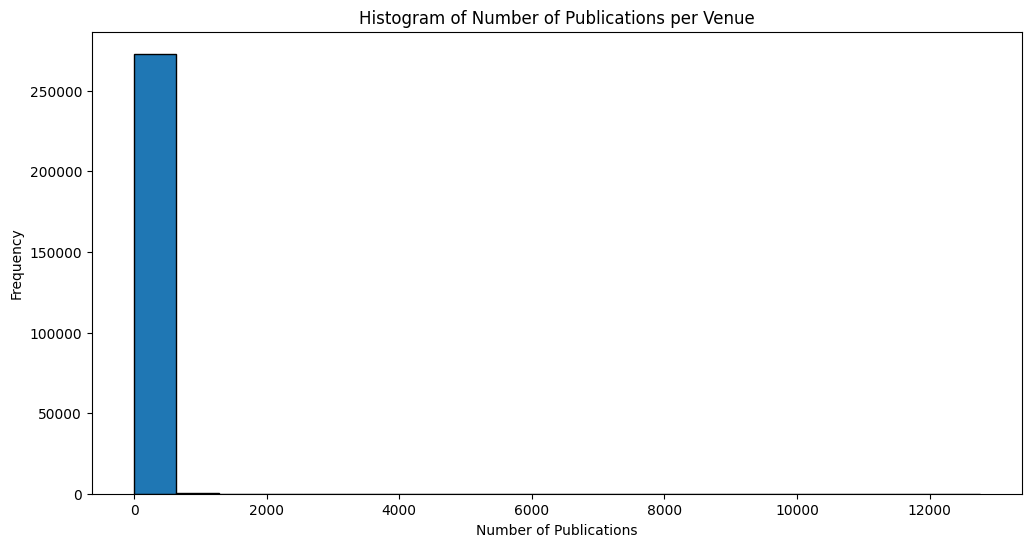

Mean: 8.725484672317975
Standard Deviation: 106.79603003804166
Median (Q2): 1.0
1st Quartile (Q1): 1.0
3rd Quartile (Q3): 1.0
Venue with the largest number of publications: IEEE Transactions on Information Theory


In [ ]:
"""
E. Now plot a histogram of the number of publications per venue, as well as 
calculate the mean, standard deviation, median, Q1, and Q3 values. 
What is the venue with the largest number of publications in the dataset?
"""

# Group publications by venue and count the number of publications per venue
publications_per_venue = df[df != 'missing'].groupby('publicationvenue')['index'].count()

# Calculate descriptive statistics of publications per venue
statistics = publications_per_venue.describe()

# Calculate the mean, standard deviation, median, Q1, and Q3 values
mean = statistics['mean']
std_dev = statistics['std']
median = statistics['50%']
q1 = statistics['25%']
q3 = statistics['75%']

# Find the venue with the largest number of publications
venue_with_most_publications = publications_per_venue.idxmax()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(publications_per_venue, bins=20, edgecolor='black')
plt.xlabel('Number of Publications')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Publications per Venue')
plt.show()

# Print the statistics and the venue with the largest number of publications
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Median (Q2):", median)
print("1st Quartile (Q1):", q1)
print("3rd Quartile (Q3):", q3)
print("Venue with the largest number of publications:", venue_with_most_publications)

In [ ]:
df.head()

,title,year,publicationvenue,index,authors,abstract,references_id
0,MOSFET table look-up models for circuit simula...,1984,"Integration, the VLSI Journal",ndex1,missing,missing,missing
1,The verification of the protection mechanisms ...,1984,International Journal of Parallel Programming,ndex2,Virgil D. Gligor,missing,missing
2,Another view of functional and multivalued dep...,1984,International Journal of Parallel Programming,ndex3,"M. Gyssens, J. Paredaens",missing,missing
3,Entity-relationship diagrams which are in BCNF,1984,International Journal of Parallel Programming,ndex4,"Sushil Jajodia, Peter A. Ng, Frederick N. Spri...",missing,missing
4,The computer comes of age,1984,The computer comes of age,ndex5,Rene Moreau,missing,missing


In [ ]:
#Drop "missing" from the data
data = df[df != 'missing'].reset_index(drop=True)
data.dropna(subset=['references_id'], inplace=True)
data.reset_index(drop=True, inplace=True)

"""
F. Plot a histogram of the number of references (number of publications a publication refers to) and citations 
(number of publications referring to a publication) per publication. What is the publication with the 
largest number of references? What is the publication with the largest number of citations? Do these make sense? 



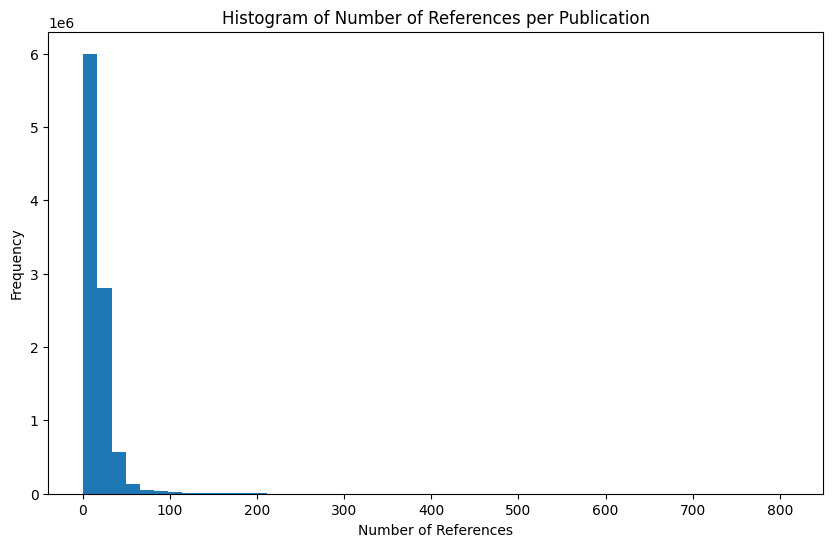

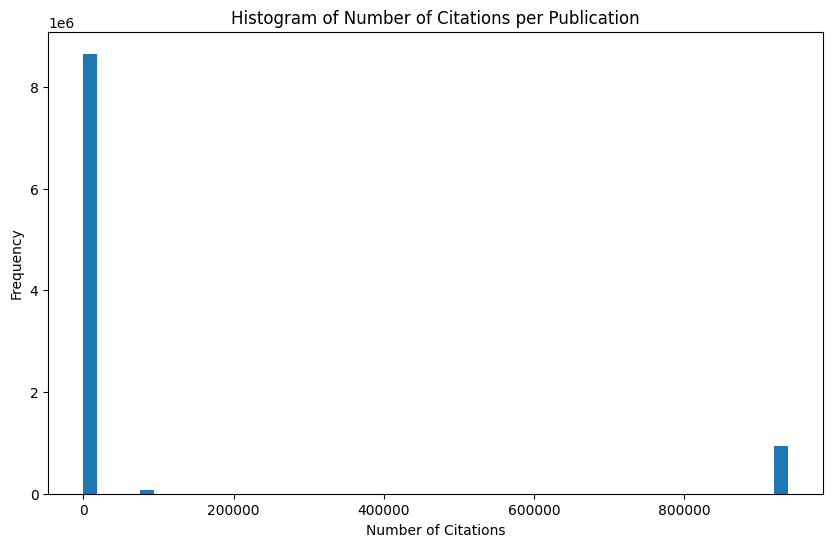

Publication with the largest number of references: Proceedings of the Twenty-Fourth ACM Symposium on Operating Systems Principles
Publication with the largest number of citations: The Three-Machine No-Wait Flow Shop is NP-Complete


In [ ]:
# Split the reference IDs and explode the column
data['references_id'] = data['references_id'].str.split(',')
data = data.explode('references_id')

# Count the number of references for each publication
data['num_references'] = data.groupby('index')['references_id'].transform('count')

# Count the number of citations for each publication
data['num_citations'] = data.groupby('references_id')['index'].transform('count')

# Plot histogram of number of references
plt.figure(figsize=(10, 6))
plt.hist(data['num_references'], bins=50)
plt.xlabel('Number of References')
plt.ylabel('Frequency')
plt.title('Histogram of Number of References per Publication')
plt.show()

# Plot histogram of number of citations
plt.figure(figsize=(10, 6))
plt.hist(data['num_citations'], bins=50)
plt.xlabel('Number of Citations')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Citations per Publication')
plt.show()

# Find the publication with the largest number of references
max_references_pub = data[data['num_references'] == data['num_references'].max()]['title'].values[0]

# Find the publication with the largest number of citations
max_citations_pub = data[data['num_citations'] == data['num_citations'].max()]['title'].values[0]

print("Publication with the largest number of references:", max_references_pub)
print("Publication with the largest number of citations:", max_citations_pub)


I. Now repeat the calculation from item C, but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications 
from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations? **bold text**


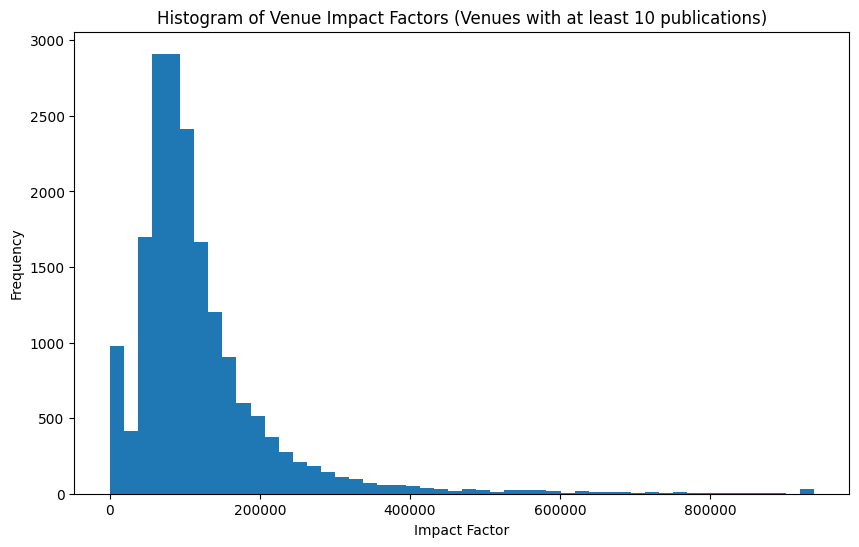

Venue with the highest apparent impact factor (with at least 10 publications): Proceedings of the 2014 international conference on Autonomous agents and multi-agent systems


In [ ]:
# Calculate the total number of citations for each venue
venue_citations = data.groupby('publicationvenue')['num_citations'].sum()

# Calculate the number of publications for each venue
venue_publications = data['publicationvenue'].value_counts()

# Filter venues with at least 10 publications
valid_venues = venue_publications[venue_publications >= 10].index

# Calculate the impact factor for valid venues
impact_factor = venue_citations.loc[valid_venues] / venue_publications.loc[valid_venues]

# Plot histogram of impact factors
plt.figure(figsize=(10, 6))
plt.hist(impact_factor, bins=50)
plt.xlabel('Impact Factor')
plt.ylabel('Frequency')
plt.title('Histogram of Venue Impact Factors (Venues with at least 10 publications)')
plt.show()

# Find the venue with the highest apparent impact factor
highest_impact_venue = impact_factor.idxmax()

print("Venue with the highest apparent impact factor (with at least 10 publications):", highest_impact_venue)

# The outliers or venues with very high impact factor are removed when we set a threshold value of 10 on number of publications and consequently the venue with high impact factor changed as well

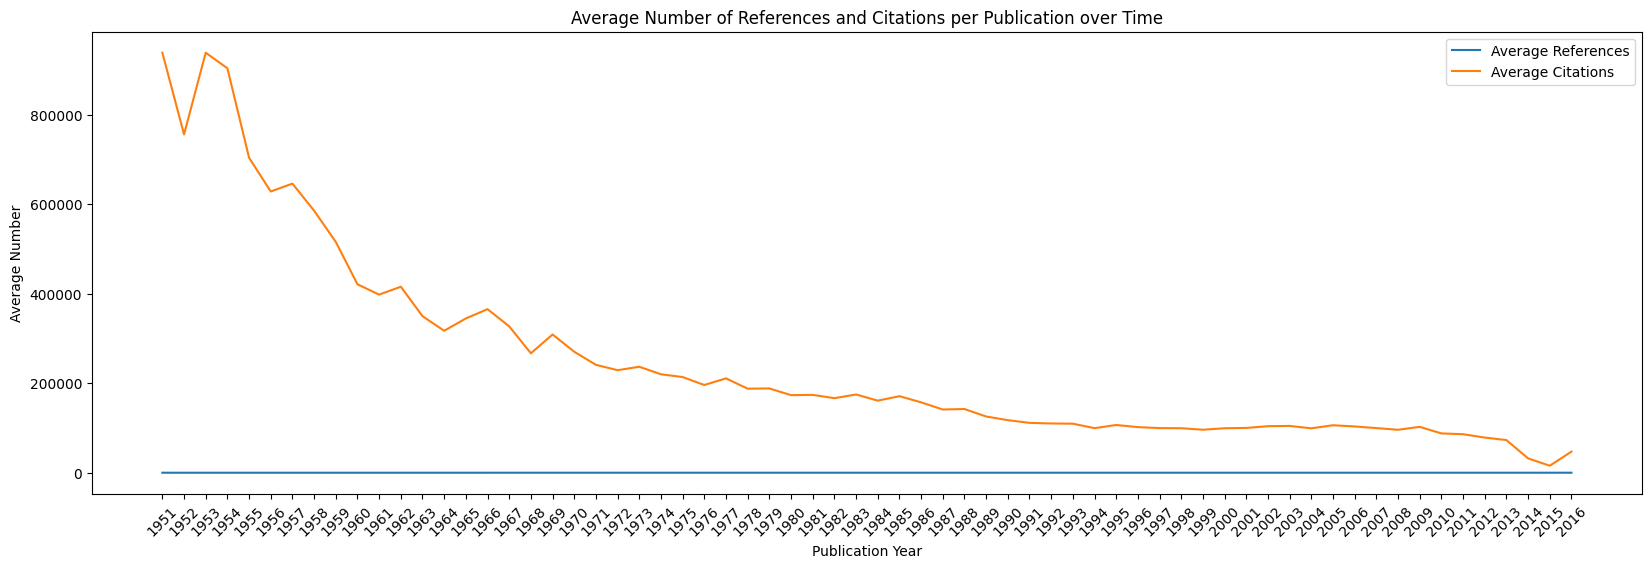

In [ ]:
import matplotlib.pyplot as plt

data = data.dropna(subset='year')

# Group the DataFrame by publication year
grouped = data.groupby('year')

# Initialize lists for average references and citations
avg_references = []
avg_citations = []

# Calculate the average number of references and citations for each year
for year, group in grouped:
    avg_ref = group['num_references'].mean()
    avg_cit = group['num_citations'].mean()
    avg_references.append(avg_ref)
    avg_citations.append(avg_cit)

# Get the publication years
years = grouped.groups.keys()

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(years, avg_references, label='Average References')
plt.plot(years, avg_citations, label='Average Citations')
plt.xlabel('Publication Year')
plt.ylabel('Average Number')
plt.title('Average Number of References and Citations per Publication over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()


[link text](https://)

In [ ]:
import gc

del df
del data
gc.collect()

27955

In [ ]:
from  google.colab import drive
drive.mount("/content/drive")

In [ ]:
!wget http://fimi.uantwerpen.be/data/kosarak.dat

--2023-05-22 03:12:50--  http://fimi.uantwerpen.be/data/kosarak.dat
Resolving fimi.uantwerpen.be (fimi.uantwerpen.be)... 143.129.69.1
Connecting to fimi.uantwerpen.be (fimi.uantwerpen.be)|143.129.69.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32029467 (31M)
Saving to: ‘kosarak.dat.1’

kosarak.dat.1       100%[===================>]  30.54M  6.89MB/s    in 4.4s    

2023-05-22 03:12:55 (6.89 MB/s) - ‘kosarak.dat.1’ saved [32029467/32029467]



A. Write a Python program which takes as its argument5 the path to a text file of data (assumed to be in the itemset format above) and produces as output to the console a sparse ARFF file.

B. Use your program to convert the kosarak.dat file to a sparse kosarak.arff. About how long did it take to run? **bold text**


In [ ]:
def convert_to_sparse_arff(input_file, output_file):
    with open(input_file, 'r') as f:
        lines = f.readlines()
    #lines = lines[:5000]
    # Extract unique news item IDs
    item_ids = set()
    for line in lines:
        items = line.strip().split()
        item_ids.update(items)

    # Sort and assign attribute indices
    sorted_item_ids = sorted(item_ids)
    attribute_indices = {item_id: str(index) for index, item_id in enumerate(sorted_item_ids, start=1)}

    with open(output_file, 'w') as f:
        # Write ARFF file header
        f.write('@relation kosarak\n')
        for item_id in sorted_item_ids:
            f.write('@attribute i{0} {{0, 1}}\n'.format(attribute_indices[item_id]))
        f.write('@data\n')

        # Write binary sequences
        for line in lines:
            items = line.strip().split()
            sequence = set()
            for item in items:
                sequence.add((int(item) - 1, 1))
            sequence = list(sequence)
            sequence = sorted(sequence, key=lambda x:x[0])
            #print(sequence)
            sequence = [f'{i[0]} {i[1]}' for i in sequence]
            f.write(f"{{{','.join(sequence)}}}\n")

# Specify the input and output file paths
input_file = 'kosarak.dat'
output_file = '/content/drive/MyDrive/KNN_Kosarok_data/kosarak_complete.arff'

# Convert the file to sparse ARFF format
convert_to_sparse_arff(input_file, output_file)

**About** how long did it take to run: Ecuting took time 9s.

=== Run information ===

Scheme:       weka.associations.FPGrowth -P 2 -I -1 -N 10 -T 0 -C 0.99 -D 0.05 -U 1.0 -M 49500.0
Relation:     kosarak
Instances:    990002
Attributes:   41270
              [list of attributes omitted]
=== Associator model (full training set) ===

FPGrowth found 2 rules (displaying top 2)

1. [i11=1, i218=1, i148=1]: 50098 ==> [i6=1]: 49866   <conf:(1)> lift:(1.64) lev:(0.02) conv:(84.4) 
2. [i11=1, i148=1]: 55759 ==> [i6=1]: 55230   <conf:(0.99)> lift:(1.63) lev:(0.02) conv:(41.3) 

In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import tensorflow as tf
from scipy.spatial.distance import cdist

In [4]:
# 20NG
# Fetch the 20NG dataset
data = fetch_20newsgroups()

# Access the data and labels
X = data.data  # Textual features
y = data.target  # Labels

In [5]:
print(X[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [6]:
import re
def normalized_score_vector(doc):
  words_count = {}
  doc = doc.lower() # converting text to lower case
  doc = re.sub('[^a-z0-9\s]+', '', doc) # filter out any non alphabetical character
  tfs = {} # maintains a tfs frequency inside document
  words = doc.split()
  for word in words:
    if word in tfs:
      tfs[word] += 1
    else:
      tfs[word] = 1
  # print(tfs)
  # document length
  DL = len(words)
  # normalize 
  normalized_tf = {word: tf/DL for word, tf in tfs.items()}
  # print(normalized_tf)
  return normalized_tf

In [7]:
# testing on single document
normalized_score_vector(X[0])

{'from': 0.025,
 'lerxstwamumdedu': 0.008333333333333333,
 'wheres': 0.008333333333333333,
 'my': 0.008333333333333333,
 'thing': 0.008333333333333333,
 'subject': 0.008333333333333333,
 'what': 0.008333333333333333,
 'car': 0.041666666666666664,
 'is': 0.025,
 'this': 0.041666666666666664,
 'nntppostinghost': 0.008333333333333333,
 'rac3wamumdedu': 0.008333333333333333,
 'organization': 0.008333333333333333,
 'university': 0.008333333333333333,
 'of': 0.025,
 'maryland': 0.008333333333333333,
 'college': 0.008333333333333333,
 'park': 0.008333333333333333,
 'lines': 0.008333333333333333,
 '15': 0.008333333333333333,
 'i': 0.025,
 'was': 0.03333333333333333,
 'wondering': 0.008333333333333333,
 'if': 0.016666666666666666,
 'anyone': 0.016666666666666666,
 'out': 0.008333333333333333,
 'there': 0.008333333333333333,
 'could': 0.008333333333333333,
 'enlighten': 0.008333333333333333,
 'me': 0.008333333333333333,
 'on': 0.016666666666666666,
 'saw': 0.008333333333333333,
 'the': 0.05,
 'o

In [8]:
# compute noramlized tf values for all documents in corpus
normalized_tfs_all = []
for doc in X:
  normalized_tfs_all.append(normalized_score_vector(doc))

In [10]:
# while developing sampling to smaller set
normalized_tfs_small = normalized_tfs_all[:10]

In [11]:
# creating vocabulary dicitonary which will generate a dictionary entry for every single word in all documents
# we will use these words to access and update our dok_matrix in sparse format
vocab_set = set()
for doc in normalized_tfs_all:
  vocab_set.update(doc.keys())
# cosine_similarity(normalized_tfs_all[0], normalized_tfs_all[1])
vocab_set = sorted(list(vocab_set))
vocab = {word:ind for ind, word in enumerate(vocab_set)}

In [12]:
# using sparse matrix representation from scipy which allows values to be accessed as dictionary of keys

from scipy.sparse import dok_matrix
matrix = dok_matrix((len(normalized_tfs_all), len(vocab)), dtype=np.float32)
for i, doc in enumerate(normalized_tfs_all):
  for word, normalized_tf in doc.items():
    j = vocab[word] # get the unique index for a word from vocab
    matrix[i, j] = normalized_tf

In [14]:
# converting the dok_matrix to csr_matrix as its is more efficient for distance computations
from scipy.sparse import csr_matrix
sparse_matrix = csr_matrix(matrix)

In [15]:
# # # Compute pairwise cosine similarity
cosine_sim = cosine_similarity(sparse_matrix)

In [16]:
# # # Compute pairwise cosine similarity
cosine_sim = cosine_similarity(sparse_matrix)

In [17]:
# # # Compute pairwise Euclidean distance
euclidean_dist = euclidean_distances(sparse_matrix)

In [18]:
 # Compute pairwise editing distance with threshold
threshold = 0.1
editing_dist = cdist(sparse_matrix, sparse_matrix, metric='minkowski', p=1) > threshold

In [ ]:
# MNIST

# Load the MNIST dataset
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()

# Flatten the images
X_train_mnist = X_train_mnist.reshape(X_train_mnist.shape[0], -1)
X_test_mnist = X_test_mnist.reshape(X_test_mnist.shape[0], -1)

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Shift and scale normalization
X_train_normalized_mnist = (X_train_mnist - np.min(X_train_mnist)) / (np.max(X_train_mnist) - np.min(X_train_mnist))
X_test_normalized_mnist = (X_test_mnist - np.min(X_test_mnist)) / (np.max(X_test_mnist) - np.min(X_test_mnist))

# Zero mean, unit variance normalization
X_train_normalized_mnist = (X_train_mnist - np.mean(X_train_mnist)) / np.std(X_train_mnist)
X_test_normalized_mnist = (X_test_mnist - np.min(X_test_mnist)) / np.std(X_test_mnist)

In [ ]:
# # # Compute pairwise cosine similarity
#cosine_sim = cosine_similarity(X_train_normalized_mnist)

# # # Compute pairwise Euclidean distance
#euclidean_dist = euclidean_distances(X_train_normalized_mnist)

# # Compute pairwise editing distance with threshold
#threshold = 0.1
#editing_dist = cdist(X_train_normalized_mnist, X_train_normalized_mnist, metric='minkowski', p=1) > threshold

"""
 MNIS 20 NG : Train and test KNN classification (supervised) 
Some datasets might come organized into train/test in which case we respect that. Other datasets come without this organization in which case we randomly ("random" here is very important, data must be shuffled) pick about 80% of data as training , 10% as validation (also used in training) and 10% as testing data (completely unavailable to training)
For each of the two datasets, now in matrix format and with pairwise similarity computed, train and test KNN classification. Report both training performance and testing performance. You are required to implement KNN yourself, but can youse suport libraries and datastructures. 
"""

In [19]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import tensorflow as tf
from scipy.spatial.distance import cdist
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
# 20NG
# Fetch the 20NG dataset
data = fetch_20newsgroups()

# Access the data and labels
X = data.data  # Textual features
y = data.target  # Labels

In [21]:
import re
def normalized_score_vector(doc):
  words_count = {}
  doc = doc.lower() # converting text to lower case
  doc = re.sub('[^a-z0-9\s]+', '', doc) # filter out any non alphabetical character
  tfs = {} # maintains a tfs frequency inside document
  words = doc.split()
  for word in words:
    if word in tfs:
      tfs[word] += 1
    else:
      tfs[word] = 1
  # print(tfs)
  # document length
  DL = len(words)
  # normalize 
  normalized_tf = {word: tf/DL for word, tf in tfs.items()}
  # print(normalized_tf)
  return normalized_tf

In [22]:
# compute noramlized tf values for all documents in corpus
normalized_tfs_all = []
for doc in X:
  normalized_tfs_all.append(normalized_score_vector(doc))

In [23]:
# creating vocabulary dicitonary which will generate a dictionary entry for every single word in all documents
# we will use these words to access and update our dok_matrix in sparse format
vocab_set = set()
for doc in normalized_tfs_all:
  vocab_set.update(doc.keys())

vocab_set = sorted(list(vocab_set))
vocab = {word:ind for ind, word in enumerate(vocab_set)}

In [24]:
# using sparse matrix representation from scipy which allows values to be accessed as dictionary of keys

from scipy.sparse import dok_matrix
matrix = dok_matrix((len(normalized_tfs_all), len(vocab)), dtype=np.float32)
for i, doc in enumerate(normalized_tfs_all):
  for word, normalized_tf in doc.items():
    j = vocab[word] # get the unique index for a word from vocab
    matrix[i, j] = normalized_tf

In [25]:
# converting the dok_matrix to csr_matrix as its is more efficient for distance computations
from scipy.sparse import csr_matrix
sparse_matrix = csr_matrix(matrix)

In [26]:
# MNIST

# Load the MNIST dataset
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()

# Flatten the images
X_train_mnist = X_train_mnist.reshape(X_train_mnist.shape[0], -1)
X_test_mnist = X_test_mnist.reshape(X_test_mnist.shape[0], -1)

11490434/11490434 [==============================] - 1s 0us/step


In [27]:
# Shift and scale normalization
X_train_normalized_mnist = (X_train_mnist - np.min(X_train_mnist)) / (np.max(X_train_mnist) - np.min(X_train_mnist))
X_test_normalized_mnist = (X_test_mnist - np.min(X_test_mnist)) / (np.max(X_test_mnist) - np.min(X_test_mnist))

# Zero mean, unit variance normalization
X_train_normalized_mnist = (X_train_mnist - np.mean(X_train_mnist)) / np.std(X_train_mnist)
X_test_normalized_mnist = (X_test_mnist - np.min(X_test_mnist)) / np.std(X_test_mnist)


In [28]:
import numpy as np
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
# 20 NG

# Split the 20NG dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(sparse_matrix, y, test_size=0.1, random_state=2023)
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2023)

In [30]:
class KNNClassifier:
    def __init__(self, k, similarity='euclidean'):
        self.k = k
        # choices euclidean and cosine
        self.similarity = 'cosine'

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        if self.similarity == 'cosine':
          distances = cosine_similarity(X_test, self.X_train)
        else:
          distances = euclidean_distances(X_test, self.X_train)
        k_nearest_indices = np.argsort(distances, axis=1)[:, :self.k]
        k_nearest_labels = self.y_train[k_nearest_indices]
        mode_labels = mode(k_nearest_labels, axis=1)[0]
        predictions = mode_labels.ravel()
        return predictions

In [31]:
# Create an instance of KNNClassifier
train_accuracies = []
test_accuracies = []
for k in range(2, 8, 1):
  print(f"Testing with k={k}")
  knn = KNNClassifier(k=k)

  # Train the KNN classifier
  knn.fit(X_train, y_train)

  # Predict on the training set
  train_predictions = knn.predict(X_train)

  # Predict on the testing set
  test_predictions = knn.predict(X_test)
  # Calculate the accuracy on the training set
  train_accuracy = accuracy_score(y_train, train_predictions)

  # Calculate the accuracy on the testing set
  test_accuracy = accuracy_score(y_test, test_predictions)

  print("Training Accuracy:", train_accuracy)
  print("Testing Accuracy:", test_accuracy)
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)

Testing with k=2


<ipython-input-30-a79f19780a4f>:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_labels = mode(k_nearest_labels, axis=1)[0]


Training Accuracy: 0.05097230406599882
Testing Accuracy: 0.054770318021201414
Testing with k=3


<ipython-input-30-a79f19780a4f>:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_labels = mode(k_nearest_labels, axis=1)[0]


Training Accuracy: 0.05087409153407975
Testing Accuracy: 0.054770318021201414
Testing with k=4


<ipython-input-30-a79f19780a4f>:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_labels = mode(k_nearest_labels, axis=1)[0]


Training Accuracy: 0.05097230406599882
Testing Accuracy: 0.054770318021201414
Testing with k=5


<ipython-input-30-a79f19780a4f>:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_labels = mode(k_nearest_labels, axis=1)[0]


Training Accuracy: 0.05097230406599882
Testing Accuracy: 0.054770318021201414
Testing with k=6


<ipython-input-30-a79f19780a4f>:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_labels = mode(k_nearest_labels, axis=1)[0]


Training Accuracy: 0.05097230406599882
Testing Accuracy: 0.054770318021201414
Testing with k=7


<ipython-input-30-a79f19780a4f>:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_labels = mode(k_nearest_labels, axis=1)[0]


Training Accuracy: 0.05097230406599882
Testing Accuracy: 0.054770318021201414
